In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt 

## Canales

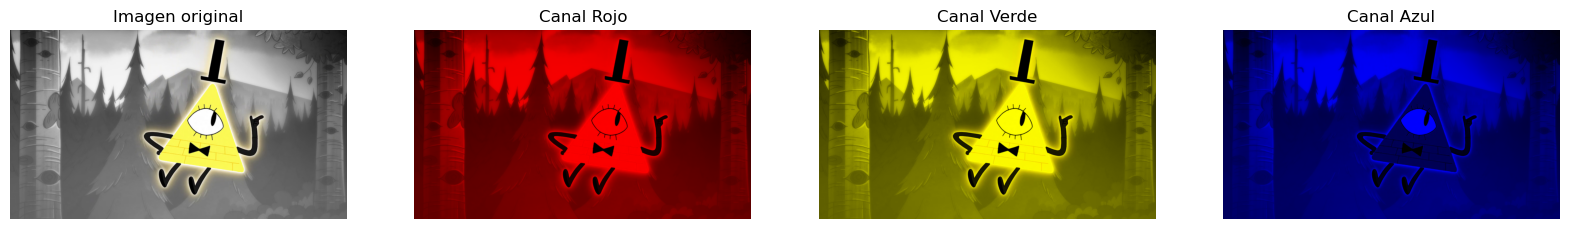

In [3]:
# Leer la imagen y convertirla a RGB
img = cv2.imread('./img/triangulo.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Crear copias de la imagen para aislar cada canal
img_R = img_rgb.copy()
img_G = img_rgb.copy()
img_B = img_rgb.copy()

# Aislar el canal R
img_R[:, :, 1] = 0  # G
img_R[:, :, 2] = 0  # B

# Aislar el canal G
img_G[:, :, 2] = 0  # B

# Aislar el canal B
img_B[:, :, 0] = 0  # R
img_B[:, :, 1] = 0  # G

# Visualizar las imágenes
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

ax[0].imshow(img_rgb)
ax[0].set_title("Imagen original")
ax[0].axis('off')

ax[1].imshow(img_R)
ax[1].set_title("Canal Rojo")
ax[1].axis('off')

ax[2].imshow(img_G)
ax[2].set_title("Canal Verde")
ax[2].axis('off')

ax[3].imshow(img_B)
ax[3].set_title("Canal Azul")
ax[3].axis('off')

plt.show()

## Gray

## Histograma

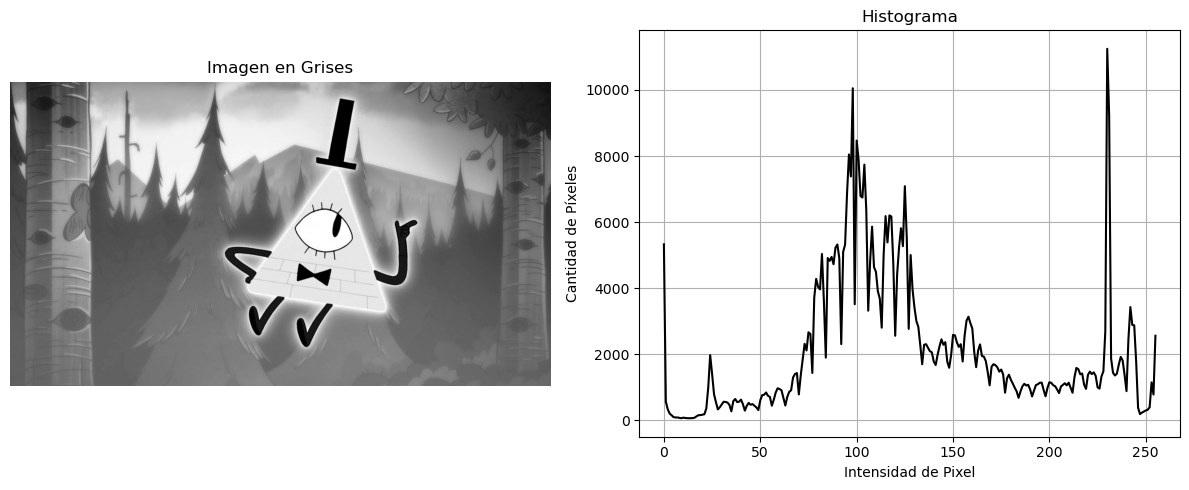

In [4]:
# Leer la imagen
img = cv2.imread('./img/triangulo.png', cv2.IMREAD_GRAYSCALE)  # Leer en escala de grises directamente

# Calcular el histograma
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# Visualizar la imagen y su histograma
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Mostrar la imagen en escala de grises
ax[0].imshow(img, cmap='gray')
ax[0].set_title("Imagen en Grises")
ax[0].axis('off')

# Mostrar el histograma
ax[1].plot(hist, color='black')
ax[1].set_title("Histograma")
ax[1].set_xlabel("Intensidad de Pixel")
ax[1].set_ylabel("Cantidad de Píxeles")
ax[1].grid(True)

plt.tight_layout()
plt.show()

## Binarizacion


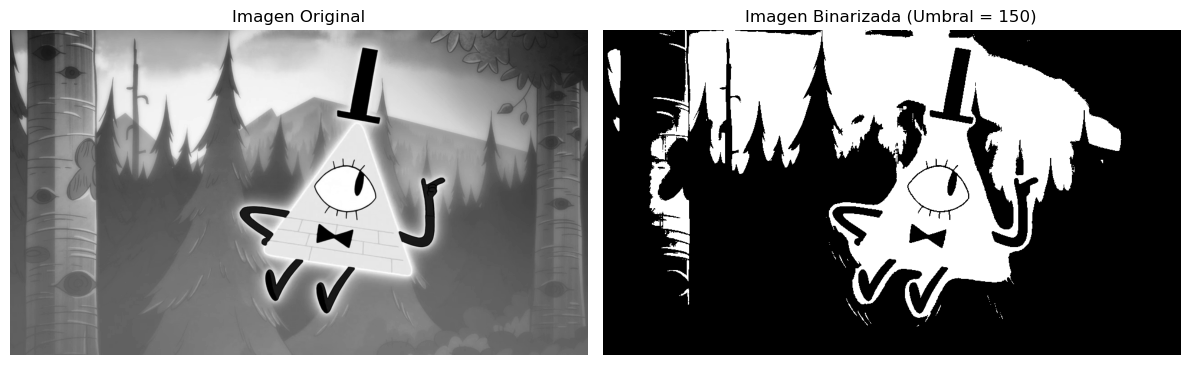

In [13]:

img = cv2.imread('./img/triangulo.png', cv2.IMREAD_GRAYSCALE)

# Definir el umbral
umbral = 150  # Puedes cambiar este valor según tus necesidades

# Binarizar la imagen
_, img_binarizada = cv2.threshold(img, umbral, 255, cv2.THRESH_BINARY)

# Visualizar la imagen original y la imagen binarizada
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Mostrar la imagen en escala de grises
ax[0].imshow(img, cmap='gray')
ax[0].set_title("Imagen Original")
ax[0].axis('off')

# Mostrar la imagen binarizada
ax[1].imshow(img_binarizada, cmap='gray')
ax[1].set_title(f"Imagen Binarizada (Umbral = {umbral})")
ax[1].axis('off')


plt.tight_layout()
plt.show()

## Operaciones binarias

Resultado AND:
[[0 0 0]
 [0 1 0]
 [0 0 0]]
Resultado OR:
[[1 1 1]
 [1 1 0]
 [1 0 1]]
Resultado NOT:
[[255 254 255]
 [254 254 255]
 [255 255 254]]
Resultado XOR:
[[1 1 1]
 [1 0 0]
 [1 0 1]]


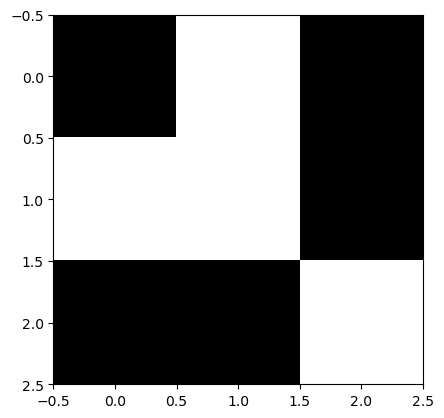

In [14]:
#Crear imágenes binarias de ejemplo
image1 = np.array([[0, 1, 0],
                   [1, 1, 0],
                   [0, 0, 1]], dtype=np.uint8)

image2 = np.array([[1, 0, 1],
                   [0, 1, 0],
                   [1, 0, 0]], dtype=np.uint8)

# Operación AND lógica
result_and = cv2.bitwise_and(image1, image2)
print("Resultado AND:")
print(result_and)

# Operación OR lógica
result_or = cv2.bitwise_or(image1, image2)
print("Resultado OR:")
print(result_or)

# Operación NOT lógica
result_not = cv2.bitwise_not(image1)
print("Resultado NOT:")
print(result_not)

# Operación XOR (o exclusivo) lógica
result_xor = cv2.bitwise_xor(image1, image2)
print("Resultado XOR:")
print(result_xor)

plt.imshow(image1, cmap="gray")

(-0.5, 2.5, 2.5, -0.5)

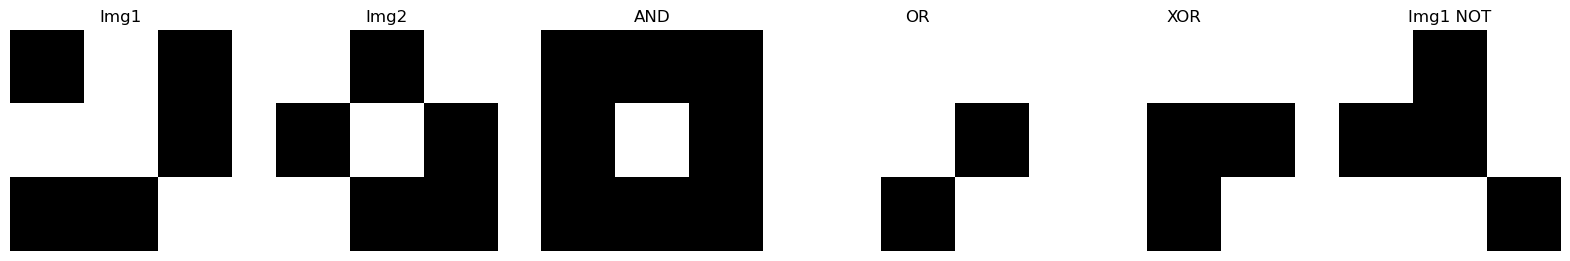

In [15]:
3

## Filtros, resize

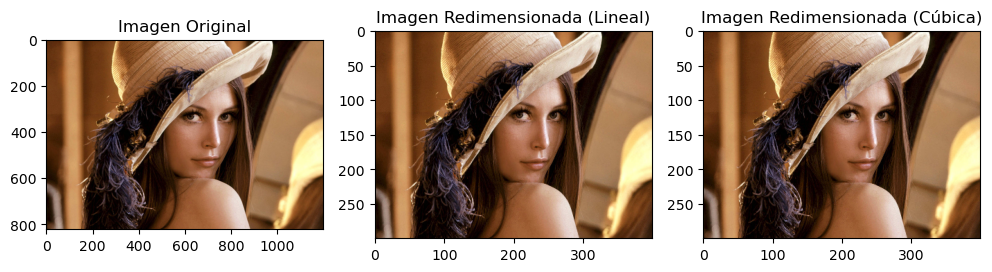

In [4]:
# Cargar una imagen
image = cv2.imread('./img/lena.jpeg')

# Definir nuevas dimensiones
nuevas_dimensiones = (400, 300)  # (ancho, alto)

# Redimensionar la imagen utilizando interpolación lineal
imagen_redimensionada_lineal = cv2.resize(image, nuevas_dimensiones, interpolation=cv2.INTER_LINEAR)

# Redimensionar la imagen utilizando interpolación cúbica
imagen_redimensionada_cubica = cv2.resize(image, nuevas_dimensiones, interpolation=cv2.INTER_CUBIC)

# Mostrar las imágenes utilizando matplotlib
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Imagen Original")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(imagen_redimensionada_lineal, cv2.COLOR_BGR2RGB))
plt.title("Imagen Redimensionada (Lineal)")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(imagen_redimensionada_cubica, cv2.COLOR_BGR2RGB))
plt.title("Imagen Redimensionada (Cúbica)")

plt.tight_layout()
plt.show()

## Filtros



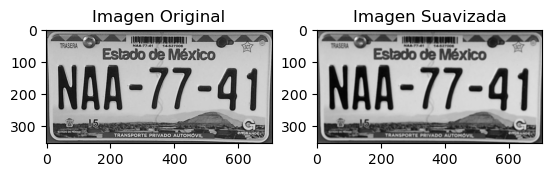

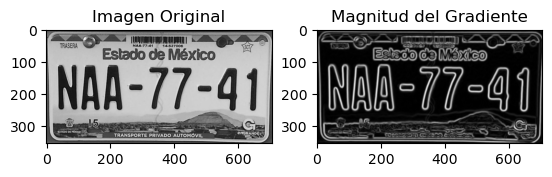

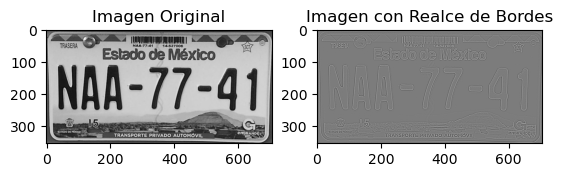

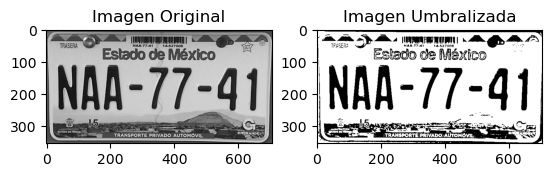

In [19]:
# Cargar una imagen en escala de grises
image = cv2.imread('./img/placa.jpg', cv2.IMREAD_GRAYSCALE)

# Filtro de Suavizado (Blur)
blurred = cv2.GaussianBlur(image, (7, 7), 0)
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')
plt.subplot(1, 2, 2)
plt.imshow(blurred, cmap='gray')
plt.title('Imagen Suavizada')
plt.show()

# Filtro de Detección de Bordes (Sobel)
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=21)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=21)
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')
plt.subplot(1, 2, 2)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Magnitud del Gradiente')
plt.show()

# Filtro de Realce de Bordes (Laplacian)
laplacian = cv2.Laplacian(image, cv2.CV_64F)
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')
plt.subplot(1, 2, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Imagen con Realce de Bordes')
plt.show()

# Filtro de Umbralización (Thresholding)
_, thresholded = cv2.threshold(image, 75, 255, cv2.THRESH_BINARY)
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')
plt.subplot(1, 2, 2)
plt.imshow(thresholded, cmap='gray')
plt.title('Imagen Umbralizada')
plt.show()